In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest
import shap
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
#loading the dataset in to pandas data frame
credit_card_data=pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.shape

(284807, 31)

In [4]:
# first 5 rows of the dataframe
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Data Cleaning
# Check for duplicate records
duplicate_rows = credit_card_data.duplicated().sum()
print('Number of duplicate records:', duplicate_rows)


Number of duplicate records: 1081


In [9]:
# Remove duplicate records
credit_card_data = credit_card_data.drop_duplicates()

In [10]:
# Check the number of missing values in each column
print(credit_card_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Distribution of legitimate transactions and fraudulent transactions
print(credit_card_data['Class'].value_counts())


0    283253
1       473
Name: Class, dtype: int64


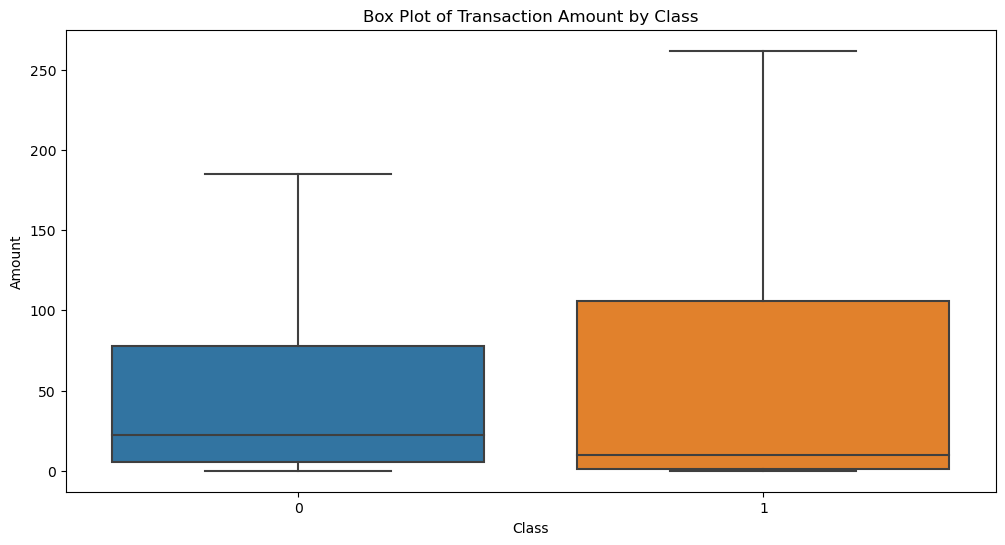

In [12]:
# Check for outliers in 'Amount' and 'Time'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data, showfliers=False)
plt.title('Box Plot of Transaction Amount by Class')
plt.show()

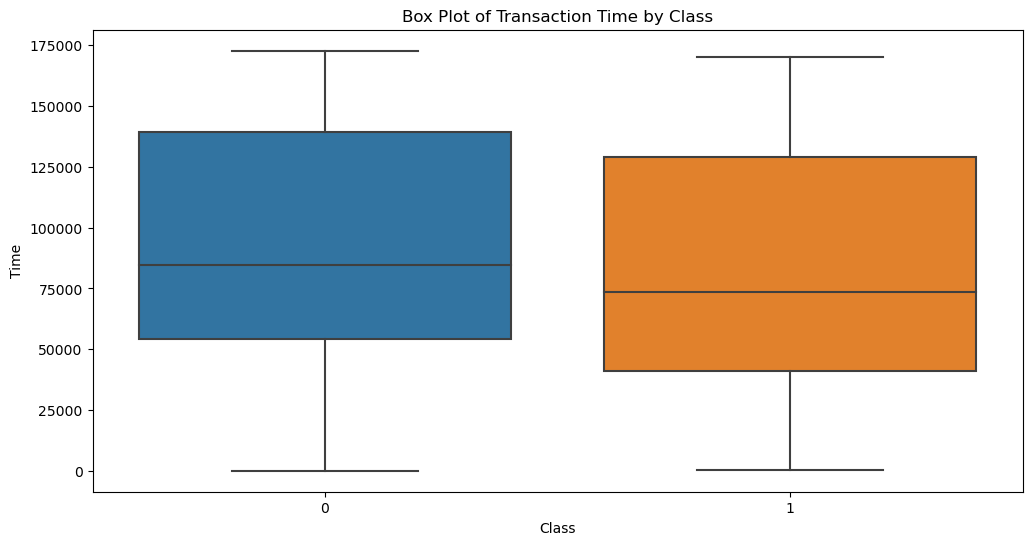

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Time', data=credit_card_data, showfliers=False)
plt.title('Box Plot of Transaction Time by Class')
plt.show()

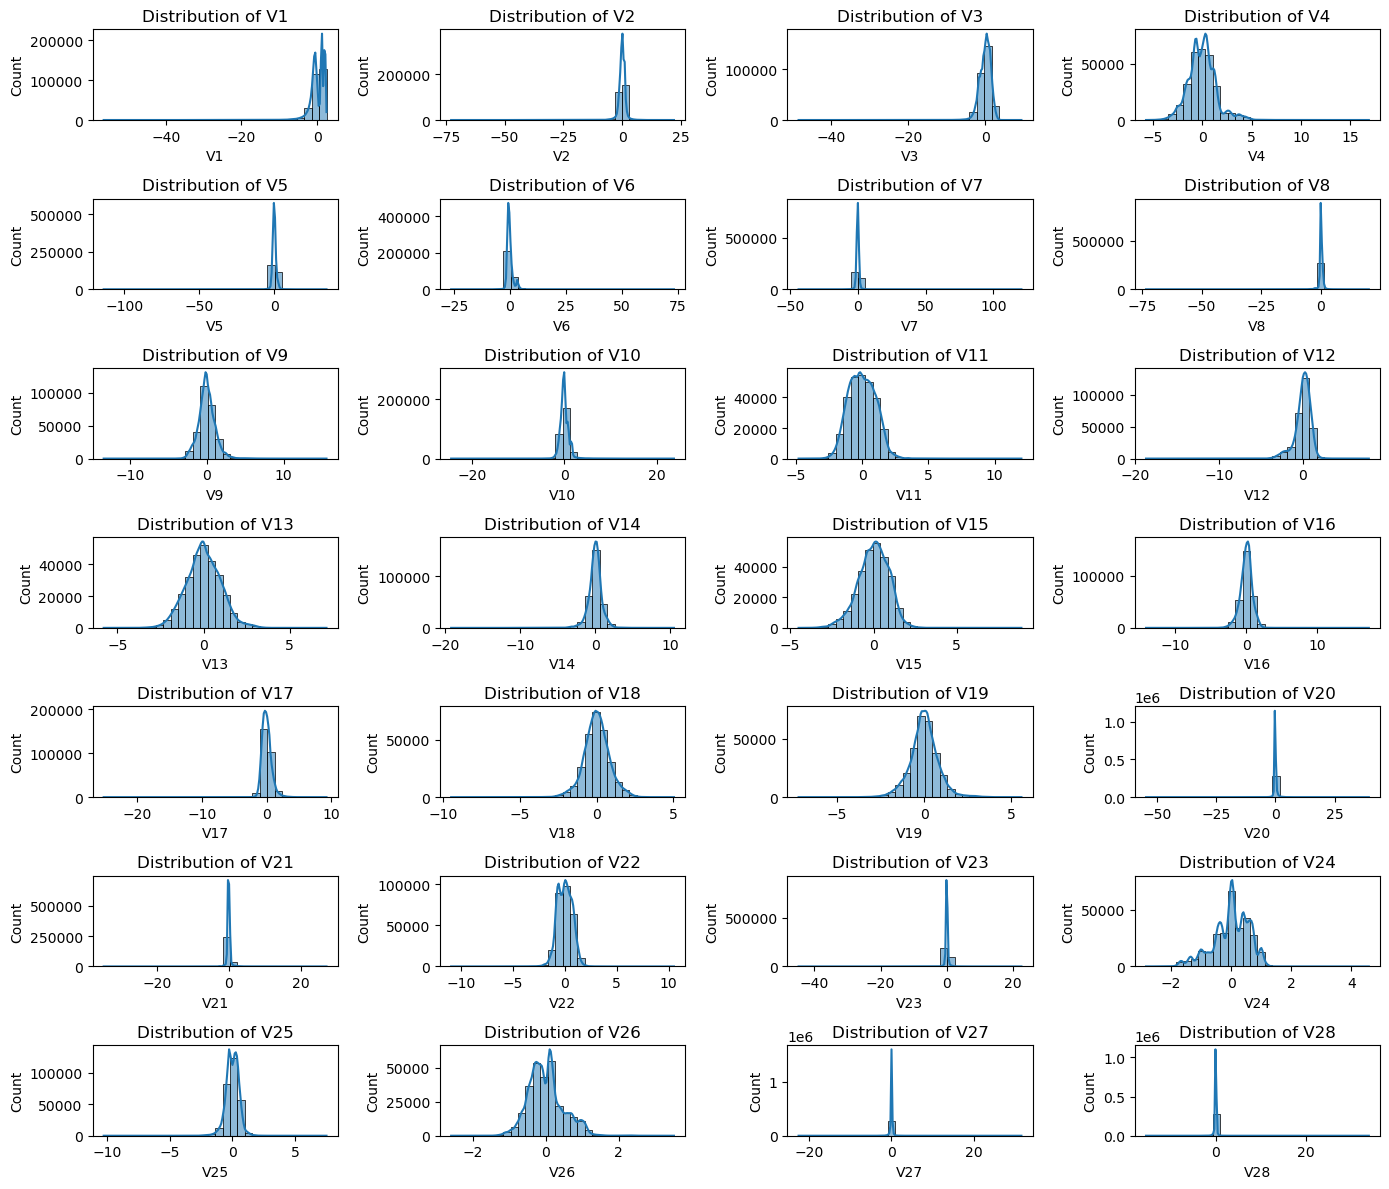

In [14]:
# Explore feature distributions
plt.figure(figsize=(14, 12))
for i in range(1, 29):  # Assuming V1 to V28 are the feature columns
    plt.subplot(7, 4, i)
    sns.histplot(credit_card_data[f'V{i}'], bins=30, kde=True)
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

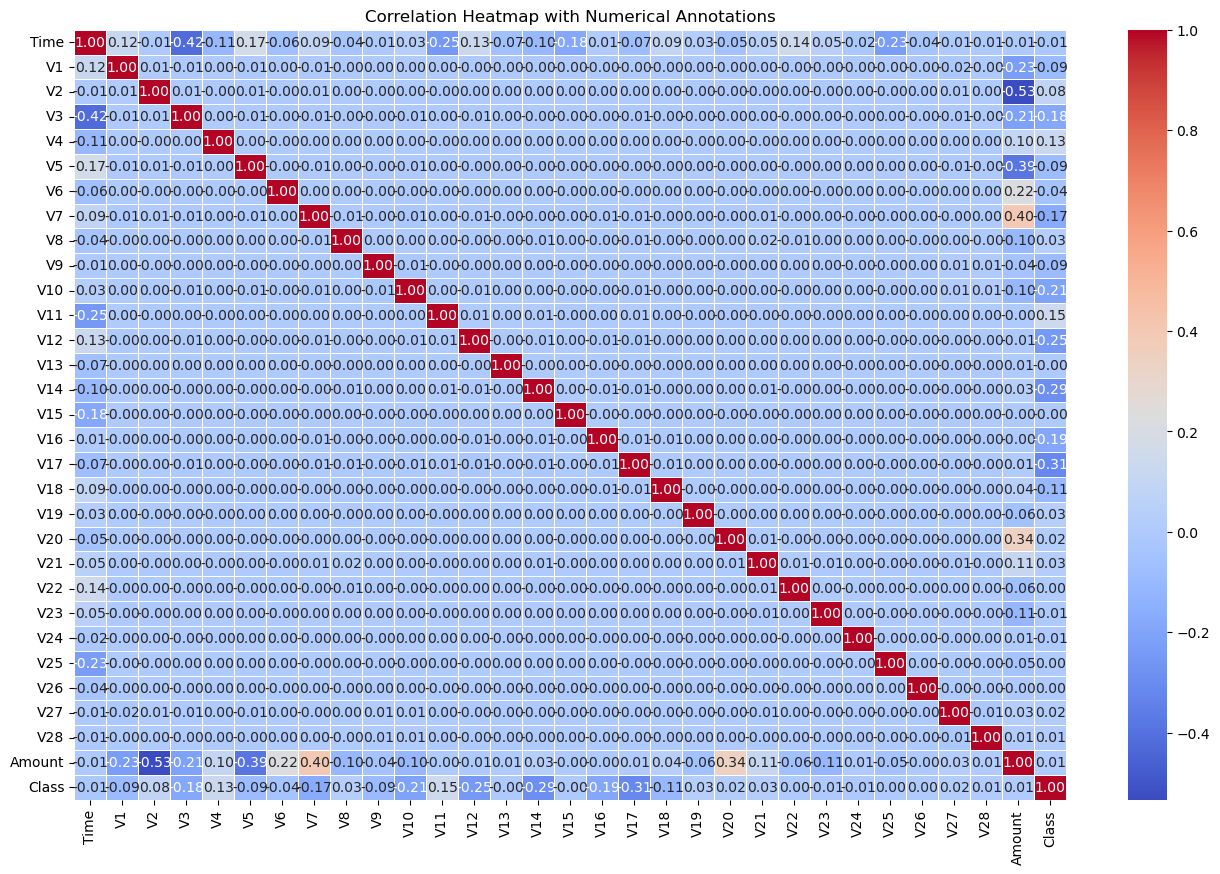

In [15]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = credit_card_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with Numerical Annotations')
plt.show()

In [16]:
# Data Preprocessing
# Handling outliers using Isolation Forest for 'Amount' and 'Time'
outlier_detector = IsolationForest(contamination=0.01, random_state=1)
credit_card_data['Outlier'] = outlier_detector.fit_predict(credit_card_data[['Amount', 'Time']])
credit_card_data = credit_card_data[credit_card_data['Outlier'] == 1].drop(columns='Outlier')


X does not have valid feature names, but IsolationForest was fitted with feature names


In [17]:
# Scaling 'Amount' using StandardScaler
scaler = StandardScaler()
credit_card_data['Amount'] = scaler.fit_transform(credit_card_data[['Amount']])


In [18]:
# Under-sampling
Legit = credit_card_data[credit_card_data['Class'] == 0]
fraud = credit_card_data[credit_card_data['Class'] == 1]
Legit_sample = Legit.sample(n=492)
new_dataset = pd.concat([Legit_sample, fraud], axis=0)

In [19]:
# Split the data into features and targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

# Split the data into Training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [32]:
# Model Selection
# Model training: Logistic Regression
logistic_model = LogisticRegression(random_state=2, max_iter=1000)  # Increase max_iter

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=2, max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameter
best_C = grid_search.best_params_['C']

# Model Training with the best hyperparameter
logistic_model = LogisticRegression(C=best_C, random_state=2, max_iter=1000)  # Increase max_iter
logistic_model.fit(X_train, Y_train)




LogisticRegression(C=1, max_iter=1000, random_state=2)

In [23]:
# Cross-Validation
cross_val_scores = cross_val_score(logistic_model, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Scores:', cross_val_scores)


Cross-Validation Scores: [0.92810458 0.94771242 0.94771242 0.92156863 0.94078947]


In [24]:
# Model Evaluation
# Accuracy score on training data for Logistic Regression
X_train_prediction_logistic = logistic_model.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction_logistic, Y_train)
print('Logistic Regression Training data accuracy:', training_data_accuracy_logistic)

# Accuracy score on test data for Logistic Regression
X_test_prediction_logistic = logistic_model.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction_logistic, Y_test)
print('Logistic Regression Test data accuracy:', test_data_accuracy_logistic)

# Additional Model Evaluation Metrics for Logistic Regression
logistic_train_auc = roc_auc_score(Y_train, logistic_model.predict_proba(X_train)[:, 1])
logistic_test_auc = roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])

print('Logistic Regression Train AUC:', logistic_train_auc)
print('Logistic Regression Test AUC:', logistic_test_auc)


Logistic Regression Training data accuracy: 0.9424083769633508
Logistic Regression Test data accuracy: 0.9322916666666666
Logistic Regression Train AUC: 0.9806588341803666
Logistic Regression Test AUC: 0.9794721407624634


In [26]:
# Model Comparison (Random Forest as an alternative)
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)

# Additional Model Evaluation Metrics for Random Forest
rf_train_auc = roc_auc_score(Y_train, rf_model.predict_proba(X_train)[:, 1])
rf_test_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1])
print('Random Forest Train AUC:', rf_train_auc)
print('Random Forest Test AUC:', rf_test_auc)

Random Forest Train AUC: 1.0
Random Forest Test AUC: 0.9732811990876508


In [27]:
# Classification report and confusion matrix for Logistic Regression
print('\nClassification Report (Logistic Regression):\n', classification_report(Y_test, X_test_prediction_logistic))
print('\nConfusion Matrix (Logistic Regression):\n', confusion_matrix(Y_test, X_test_prediction_logistic))



Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        99
           1       0.94      0.91      0.93        93

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192


Confusion Matrix (Logistic Regression):
 [[94  5]
 [ 8 85]]


In [28]:
# Classification report and confusion matrix for Random Forest
print('\nClassification Report (Random Forest):\n', classification_report(Y_test, rf_model.predict(X_test)))
print('\nConfusion Matrix (Random Forest):\n', confusion_matrix(Y_test, rf_model.predict(X_test)))



Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.97      0.91      0.94        93

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192


Confusion Matrix (Random Forest):
 [[96  3]
 [ 8 85]]


In [29]:
# Model Interpretability
# Logistic Regression coefficients
feature_names = X.columns
coefficients = logistic_model.coef_[0]
feature_importance_logistic = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_logistic = feature_importance_logistic.sort_values(by='Coefficient', ascending=False)
print('\nLogistic Regression Coefficients:\n', feature_importance_logistic)



Logistic Regression Coefficients:
    Feature  Coefficient
4       V4     0.782904
29  Amount     0.291047
11     V11     0.226321
5       V5     0.219586
22     V22     0.153783
21     V21     0.091016
28     V28     0.018771
0     Time    -0.000027
27     V27    -0.004805
24     V24    -0.005043
1       V1    -0.018841
19     V19    -0.020364
26     V26    -0.036697
20     V20    -0.041377
13     V13    -0.051146
15     V15    -0.076604
18     V18    -0.091899
23     V23    -0.100396
25     V25    -0.103328
8       V8    -0.148545
2       V2    -0.152506
7       V7    -0.165021
9       V9    -0.214387
16     V16    -0.294252
6       V6    -0.307718
10     V10    -0.347014
12     V12    -0.409223
17     V17    -0.472837
3       V3    -0.656912
14     V14    -0.963589


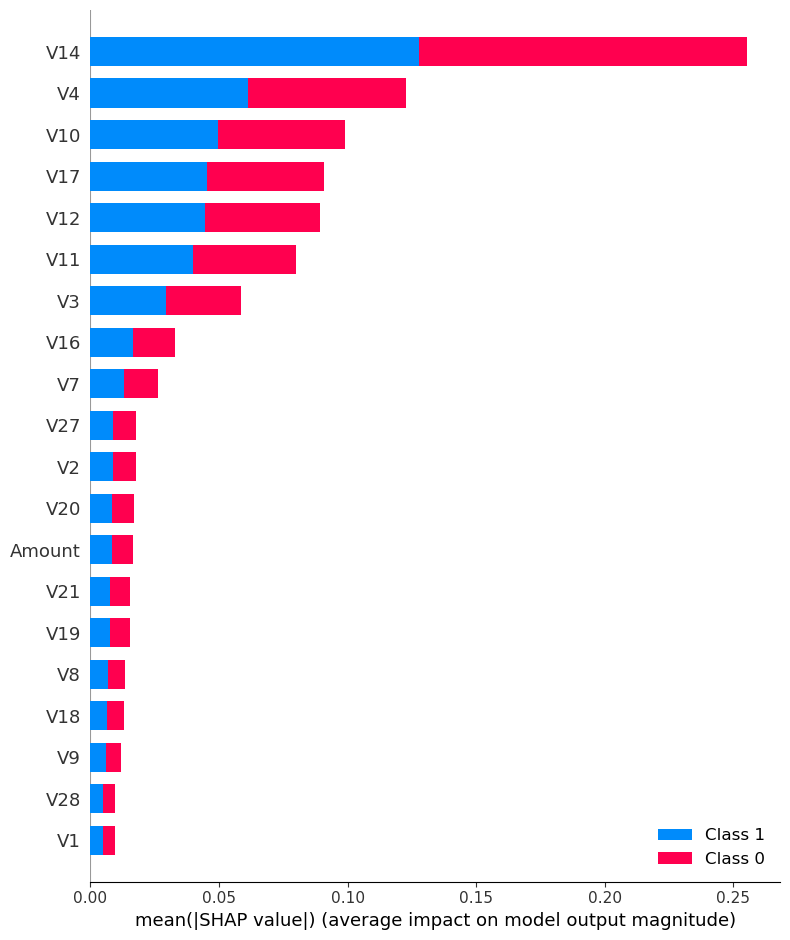

In [30]:
# SHAP values for Random Forest
shap_values_rf = shap.TreeExplainer(rf_model).shap_values(X_train)
shap.summary_plot(shap_values_rf, X_train, plot_type='bar')


In [31]:
#saving the models in the pickle file
import pickle

# Save Logistic Regression model to a file
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

# Save Random Forest model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
